### Parameters:
- days = 14
- target_impression = 30000
- setpoint = target_impression / (days * 24 * 3600)
- p = 1
- i = 1
- d = 1, but d is positive in the controller `d_output = state.kd * (input - state.last_input)`
- f = 1
- no max output limt

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/pid_3.csv')

In [3]:
start = df.loc[0, 'timestamp']
df = df.drop(0)
df['velocity'] = df['delivered_impression'] / (df['timestamp'] - start + 1)
df.set_index(pd.to_datetime(df['timestamp'], unit='s'), inplace=True)

In [4]:
df.head()

,delivered_impression,timestamp,velocity
timestamp,,,
2022-04-01 23:41:34,2,1648856494,0.086957
2022-04-01 23:41:56,2,1648856516,0.044444
2022-04-01 23:42:18,2,1648856538,0.029851
2022-04-01 23:42:40,2,1648856560,0.022472
2022-04-01 23:43:03,2,1648856583,0.017857


<AxesSubplot:xlabel='timestamp'>

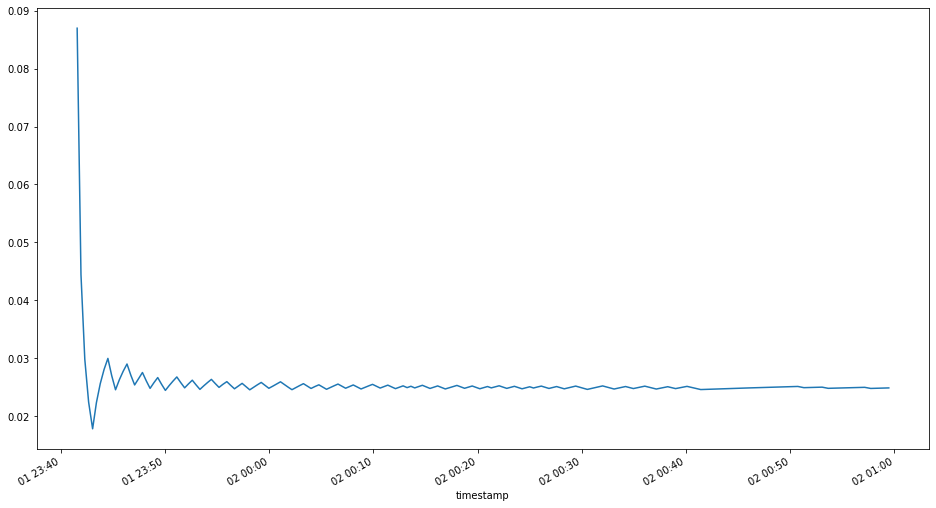

In [5]:
df_first = df.drop(df[df.index > '2022-04-02 01:00:00'].index)
df_first['velocity'].plot(figsize=(16,9))